# 1.Implement Tic-Tac-Toe game

## a.Traditional approach

In [2]:
import numpy as np
gc=0 #gamecount
def game(gc):
    x,c=[' ']*9,0
    def p(c): #player's function
        i=int(input(f'player {c}\'s turn: '))-1 #c variable is not global c. here c is used to determine which player is playing
        while x[i]!=' ': i=int(input('position occupied! enter another position number: '))-1
        x[i]='O' if c%2==0 else 'X'
        
    def display(): print('\n--+---+--\n'.join([' | '.join(x[i:i+3]) for i in range(0,9,3)]))
    
    def win(x): #checking for winner
        y=np.resize(np.array(x),(3,3))
        for i in range(3):
            if "".join(y[:,i])=='XXX' or "".join(y[i,:])=='XXX': return 'player 1'
            elif "".join(y[:,i])=='OOO' or "".join(y[i,:])=='OOO': return 'player 2'
        if "".join(np.diag(y[::-1]))=='XXX' or "".join(np.diag(y))=='XXX': return 'player 1'
        elif "".join(np.diag(y[::-1]))=='OOO' or "".join(np.diag(y))=='OOO': return 'player 2'
        return ''
    
    display() #displaying the board in initial
    while True:
        p(1) if gc%2==0 else p(2) #roles will be reversed in next game
        c+=1
        display()
        if c>4 and win(x): break 
        if c==9: break #checking the Tie condition
        p(2) if gc%2==0 else p(1)
        c+=1
        display()
        if c>4 and win(x): break
    if c!=9: print(f'{win(x)} won') #to print who is the winner
    else: print('It\'s a Tie')
    ch=input('want to play again(y/n)? ')
    if ch=='y' or ch=='Y':
        gc+=1
        game(gc)
game(gc)

  |   |  
--+---+--
  |   |  
--+---+--
  |   |  
player 1's turn: 5
  |   |  
--+---+--
  | X |  
--+---+--
  |   |  
player 2's turn: 1
O |   |  
--+---+--
  | X |  
--+---+--
  |   |  
player 1's turn: 2
O | X |  
--+---+--
  | X |  
--+---+--
  |   |  
player 2's turn: 8
O | X |  
--+---+--
  | X |  
--+---+--
  | O |  
player 1's turn: 3
O | X | X
--+---+--
  | X |  
--+---+--
  | O |  
player 2's turn: 7
O | X | X
--+---+--
  | X |  
--+---+--
O | O |  
player 1's turn: 9
O | X | X
--+---+--
  | X |  
--+---+--
O | O | X
player 2's turn: 4
O | X | X
--+---+--
O | X |  
--+---+--
O | O | X
player 2 won
want to play again(y/n)? n


## b. Approach 2

In [1]:
'''using AI (approach 2)'''
import numpy as np 
gc=0
def game(gc):
    x,c=np.full((3,3),' '),0 #creating the board and local count variable
    def win(y): #checking for winner
        for i in range(3):
            if "".join(y[:,i])=='XXX' or "".join(y[i,:])=='XXX': return 'player'
            elif "".join(y[:,i])=='OOO' or "".join(y[i,:])=='OOO': return 'AI'
        if "".join(np.diag(y[::-1]))=='XXX' or "".join(np.diag(y))=='XXX': return 'player'
        elif "".join(np.diag(y[::-1]))=='OOO' or "".join(np.diag(y))=='OOO': return 'AI'
        return ''
 
    def AI():
        print('after AI turn...')
        if  x[1][1]==' ': #middle position is given the highest preference
            x[1][1]='O'
            return
        for k in range(1,3):
            l=2 if k==1 else 1
            for j in ('O','X'): #checking posibility for computer to win else blocking player's possibility to win
                if np.count_nonzero(np.diag(x)==j)==l and np.count_nonzero(np.diag(x)==' ')==k: #diagonals were given highest priority
                    pos=np.where(np.diag(x)==' ')[0][0]
                    x[pos][pos]='O'
                    return 
                if np.count_nonzero(np.diag(x[::-1])==j)==l and np.count_nonzero(np.diag(x[::-1])==' ')==k:
                    pos=np.where(np.diag(x[::-1])==' ')[0][0]
                    x[2-pos][pos]='O'
                    return 
                for i in range(3):
                    if np.count_nonzero(x[:,i] == j)==l and np.count_nonzero(x[:,i]==' ')==k:
                        pos=np.where(x[:,i]==' ')[0][0]
                        x[pos][i]='O'
                        return 
                    if np.count_nonzero(x[i,:] == j)==l and np.count_nonzero(x[i,:]==' ')==k:
                        pos=np.where(x[i,:]==' ')[0][0]
                        x[i][pos]='O'
                        return 
        i,j=np.argwhere(x==' ')[0]
        x[i][j]='O'
        
    def player(): #player playing...
        i = int(input('enter position(1-9): '))
        while x[(i-1)//3][(i-1)%3] != ' ': i=int(input('position occupied! enter another position (1-9): '))
        x[(i-1)//3][(i-1)%3] = 'X'
        
    def display(): #displaying the board
        for i in x: print(i)

    display()
    while True:
        player() if gc%2==0 else AI()  #player has to play first in the begining on next game computer plays first
        c += 1
        display()
        if c > 4 and win(x): break
        if c == 9: break
        AI() if gc%2==0 else player()
        c += 1
        display()
        if c > 4 and win(x): break
    print(f'{win(x)} won') if c!=9 else  print('It\'s a tie ')#printing the winner
    ch=input('want to play again(y/n)? ')
    if ch=='y' or ch=='Y':
        gc+=1
        game(gc)
if __name__=='__main__':
    game(gc)

[' ' ' ' ' ']
[' ' ' ' ' ']
[' ' ' ' ' ']
enter position(1-9): 5
[' ' ' ' ' ']
[' ' 'X' ' ']
[' ' ' ' ' ']
after AI turn...
['O' ' ' ' ']
[' ' 'X' ' ']
[' ' ' ' ' ']
enter position(1-9): 5
position occupied! enter another position (1-9): 1
position occupied! enter another position (1-9): 3
['O' ' ' 'X']
[' ' 'X' ' ']
[' ' ' ' ' ']
after AI turn...
['O' ' ' 'X']
[' ' 'X' ' ']
['O' ' ' ' ']
enter position(1-9): 2
['O' 'X' 'X']
[' ' 'X' ' ']
['O' ' ' ' ']
after AI turn...
['O' 'X' 'X']
['O' 'X' ' ']
['O' ' ' ' ']
AI won
want to play again(y/n)? y
[' ' ' ' ' ']
[' ' ' ' ' ']
[' ' ' ' ' ']
after AI turn...
[' ' ' ' ' ']
[' ' 'O' ' ']
[' ' ' ' ' ']
enter position(1-9): 1
['X' ' ' ' ']
[' ' 'O' ' ']
[' ' ' ' ' ']
after AI turn...
['X' ' ' ' ']
[' ' 'O' ' ']
['O' ' ' ' ']
enter position(1-9): 2
['X' 'X' ' ']
[' ' 'O' ' ']
['O' ' ' ' ']
after AI turn...
['X' 'X' 'O']
[' ' 'O' ' ']
['O' ' ' ' ']
AI won
want to play again(y/n)? n


## c.Approach 3

In [2]:
'''using approach 3(magic square) method'''
# 8 1 6
# 3 5 7
# 4 9 2

from itertools import combinations
po={1:8,2:1,3:6,4:3,5:5,6:7,7:4,8:9,9:2} #referencing
place={8:0,1:1,6:2,3:3,5:4,7:5,4:6,9:7,2:8} #dereferencing
gc=0 #to determine who should play first

def game(gc):
    x,c,p,a=[' ']*9,0,[],[]

    def win(x): #checking for winner
        for i in combinations(a,2):
            tem=15-(po[i[0]]+po[i[1]])
            if 10>tem>0 and x[place[tem]]=='O' and tem!=po[i[0]] and tem!=po[i[1]]:return 'AI'
        for i in combinations(p,2):
            tem=15-(po[i[0]]+po[i[1]])
            if 10>tem>0 and x[place[tem]]=='X' and tem!=po[i[0]] and tem!=po[i[1]]:return 'Player'

    def display():
        for i in range(0,9,3): print(x[i:i+3])

    def AI():
        print('after AI turn.... ')
        if x[4]==' ':
            x[4]='O'
            a.append(5)
            return
        if c>2:
            for i in combinations(a,2):
                tem=15-(po[i[0]]+po[i[1]])
                if 10>tem>0 and x[place[tem]]==' ':
                    x[place[tem]]='O'
                    a.append(place[tem]+1)
                    return
            else:
                for i in combinations(p,2):
                    tem=15-(po[i[0]]+po[i[1]])
                    if 10>tem>0 and x[place[tem]]==' ':
                        x[place[tem]]='O'
                        a.append(place[tem]+1)
                        return
        te=x.index(' ')
        x[te]='O'
        a.append(te+1)
        return

    def player():
        i=int(input('enter postion: '))-1
        while x[i]!=' ':i=int(input('position occupied! enter another position number: '))-1
        x[i]='X'
        p.append(i+1)
        
    display()
    while True:
        player() if gc%2==0 else AI()  
        c += 1
        display()
        if c > 4 and win(x): break
        if c == 9: break
        AI() if gc%2==0 else player()
        c += 1
        display()
        if c > 4 and win(x): break
    if c!=9: print(f'{win(x)} won') #to print who is the winner
    else: print('It\'s a Tie')
    ch=input('want to play again(y/n)?')
    if ch=='y' or ch=='Y':
        gc+=1
        game(gc)
        
if __name__=='__main__':
    game(gc)

[' ', ' ', ' ']
[' ', ' ', ' ']
[' ', ' ', ' ']
enter postion: 3
[' ', ' ', 'X']
[' ', ' ', ' ']
[' ', ' ', ' ']
after AI turn.... 
[' ', ' ', 'X']
[' ', 'O', ' ']
[' ', ' ', ' ']
enter postion: 3
position occupied! enter another position number: 2
[' ', 'X', 'X']
[' ', 'O', ' ']
[' ', ' ', ' ']
after AI turn.... 
['O', 'X', 'X']
[' ', 'O', ' ']
[' ', ' ', ' ']
enter postion: 9
['O', 'X', 'X']
[' ', 'O', ' ']
[' ', ' ', 'X']
after AI turn.... 
['O', 'X', 'X']
[' ', 'O', 'O']
[' ', ' ', 'X']
enter postion: 8
['O', 'X', 'X']
[' ', 'O', 'O']
[' ', 'X', 'X']
after AI turn.... 
['O', 'X', 'X']
['O', 'O', 'O']
[' ', 'X', 'X']
AI won
want to play again(y/n)?y
[' ', ' ', ' ']
[' ', ' ', ' ']
[' ', ' ', ' ']
after AI turn.... 
[' ', ' ', ' ']
[' ', 'O', ' ']
[' ', ' ', ' ']
enter postion: 1
['X', ' ', ' ']
[' ', 'O', ' ']
[' ', ' ', ' ']
after AI turn.... 
['X', 'O', ' ']
[' ', 'O', ' ']
[' ', ' ', ' ']
enter postion: 8
['X', 'O', ' ']
[' ', 'O', ' ']
[' ', 'X', ' ']
after AI turn.... 
['X', 'O

## 2.	Implement Exhaustive search techniques using
**a.BFS<br>
b.DFS<br>
c.Depth-First Iterative Deepening<br>
d.Bidirectional**


In [3]:
class Generalalgorithms:
    def __init__(self,graph,start,goal):
        self.graph=graph
        self.start=start
        self.goal=goal 
    
    def bfs(self):
        open=[self.start]
        closed=set()
        while open:
            node=open.pop(0)
            closed.add(node)
            print(node, end=" ")
            for neighbor in self.graph[node]:
                if neighbor not in closed:
                    closed.add(neighbor)
                    open.append(neighbor)
        print("BFS Graph traversal completed")
    
    def dfs(self):
        open=[self.start]
        closed=set()
        while open:
            node=open.pop()
            closed.add(node)
            print(node, end=" ")
            for neighbor in self.graph[node]:
                if neighbor not in closed:
                    closed.add(neighbor)
                    open.append(neighbor)
        print("DFS Graph traversal completed")  
    
    def dfid(self,depth):
        open=[(self.start,0)]
        closed=set()
        trav=[]
        while open:
            node=open.pop()
            dep=node[1]+1
            node=node[0]
            closed.add(node)
            if str(node) not in trav: trav.append(str(node))
            for neighbor in self.graph[node]:
                if neighbor not in closed:
                    closed.add((neighbor,dep))
                    open.append((neighbor,dep))
            open=list(filter(lambda x:x[1]<=depth,open))
        print(' '.join(trav),end=' ')
        print(f"DFID Graph traversal of depth {depth} completed")
    
    def bid(self):
        open=[self.start]
        open2=[self.goal]
        closed=set()
        closed2=set()
        top,bot=[],[]
        while open and open2:
            node=open.pop(0)
            node2=open2.pop(0)
            closed.add(node)
            closed2.add(node2)
            top.append(node)
            bot.append(node2)
            if node in closed2:
                print(f'from start node visited nodes are {closed}')
                print(f'from goal node visited nodes are {closed2}')
                return f'goal found!\nintersection at {node}'
            for neighbor in self.graph[node]:
                if neighbor not in closed:
                    closed.add(neighbor)
                    open.append(neighbor)
            for neighbor in self.graph[node2]:
                if neighbor not in closed2:
                    closed2.add(neighbor)
                    open2.append(neighbor)
        return f'Bidirectional search completed no solution found'
    
# if __name__ =='__main__':
#     #graph={ 0:[1,2], 1:[2], 2:[0,3],3:[3]}
#     #dfs(graph,'A')
#     graph=Generalalgorithms({0:[1,2,4],1:[0,3],2:[0,3,4],3:[1,2,4],4:[0,2,3]},1,4)
#     graph.bfs()
#     graph.dfs()
#     for i in range(3):
#         graph.dfid(i)
#     graph.bid()
'''dynamic'''
if __name__ =='__main__':
    n=int(input('enter number of nodes: '))
    graph={i:[] for i in range(n)}
    ed=int(input('enter number of edges: '))
    for i in range(ed):
        n,m=map(int,input().split())
        graph[n].append(m)
        graph[m].append(n)
    s=int(input('enter source node: '))
    d=int(input('enter goal node: '))
    print(graph)
    graph=Generalalgorithms(graph,s,d)
    graph.bfs()
    graph.dfs()
    for i in range(n-1):
        graph.dfid(i)
    print('Bidirectional Search')
    print(graph.bid())

enter number of nodes: 11
enter number of edges: 14
0 1
0 2
0 3
1 6
6 3
2 4
2 5
2 3
3 7
7 9
7 10
4 8
4 10
5 8
enter source node: 0
enter goal node: 10
{0: [1, 2, 3], 1: [0, 6], 2: [0, 4, 5, 3], 3: [0, 6, 2, 7], 4: [2, 8, 10], 5: [2, 8], 6: [1, 3], 7: [3, 9, 10], 8: [4, 5], 9: [7], 10: [7, 4]}
0 1 2 3 6 4 5 7 8 10 9 BFS Graph traversal completed
0 3 7 10 4 8 5 9 6 2 1 DFS Graph traversal completed
0 DFID Graph traversal of depth 0 completed
0 3 2 1 DFID Graph traversal of depth 1 completed
0 3 7 2 6 5 4 1 DFID Graph traversal of depth 2 completed
0 3 7 10 9 2 5 4 6 1 DFID Graph traversal of depth 3 completed
Bidirectional Search
from start node visited nodes are {0, 1, 2, 3, 4, 5, 6}
from goal node visited nodes are {2, 3, 4, 7, 8, 9, 10}
goal found!
intersection at 3


## 3.	Implement water jug problem with Search tree generation using
**a.	BFS          b.  DFS**


In [2]:
class State:
    def __init__(self,bjug,sjug,bmax,smax):
        self.bjug = bjug
        self.sjug = sjug
        self.bmax = bmax
        self.smax = smax
        self.par= None
    
    def isvalid(self): # to check the state is valid or not
        if self.bjug>=0 and self.sjug>=0 and self.bjug<=self.bmax and self.sjug<=self.smax:
            return True
        return False
    
    def isgoal(self,goal): # to check the goal is reached or not
        if self.bjug==goal or self.sjug==goal:
            return True
        return False
    
    def __eq__(self,other): #for checking to objects
        return self.bjug==other.bjug and self.sjug==other.sjug
    
    def __hash__(self): #for set hashing
        return hash((self.bjug,self.sjug))
    
    def __str__(self): #for printing the object
        return f'({self.bjug},{self.sjug})'
    
    
def successors(node,x): # to derive the sucessors of a node
    children = []
    '''from Big jug to Small jug'''
    if x==1: 
        if node.bjug==0:
            nstate=State(node.bmax,node.sjug,node.bmax,node.smax)
            if nstate.isvalid():
                nstate.par=node
                children.append(nstate) 
        if node.sjug==node.smax:
            nstate=State(node.bjug,0,node.bmax,node.smax)
            if nstate.isvalid():
                nstate.par=node
                children.append(nstate)
        if node.bjug>node.sjug and node.bjug+node.sjug>node.smax: 
            nstate=State(node.bjug-(node.smax-node.sjug),node.smax,node.bmax,node.smax)
            if nstate.isvalid():
                nstate.par=node
                children.append(nstate) 
        nstate=State(0,node.bjug+node.sjug,node.bmax,node.smax)
        if nstate.isvalid():
            nstate.par=node
            children.append(nstate)
    else:
        '''from Small jug to Big jug'''
        if node.sjug==0: 
            nstate=State(node.bjug,node.smax,node.bmax,node.smax)
            if nstate.isvalid():
                nstate.par=node
                children.append(nstate) 
        if node.bjug==node.bmax: 
            nstate=State(0,node.sjug,node.bmax,node.smax)
            if nstate.isvalid():
                nstate.par=node
                children.append(nstate) 
        if node.bjug<node.bmax and node.bjug+node.sjug>node.bmax: 
            nstate=State (node.bmax,(node.bjug+node.sjug)-node.bmax,node.bmax,node.smax)
            if nstate.isvalid():
                nstate.par=node
                children.append(nstate) 
        nstate=State (node.bjug+node.sjug,0,node.bmax,node.smax)
        if nstate.isvalid():
            nstate.par=node
            children.append(nstate)
    return children


def dfs(bj,sj,goal,x):
    recordx = State(0,0,bj,sj)
    if recordx.isgoal(goal): return recordx
    openlist = [recordx] #openlist is a list of states
    closed = set() #closed is a list of visited states
    while openlist:
        state = openlist.pop(0)
        if state.isgoal(goal): return state
        closed.add(state)
        children = successors(state,x)
        temp=[]
        for i in children:
            if i not in closed: temp.append(i) 
        openlist = temp[::-1] + openlist #adding children to openlist
    return None

def bfs(bj,sj,goal,x):
    recordx = State(0,0,bj,sj)
    if recordx.isgoal(goal): return recordx
    openlist = [recordx] #openlist is a list of states
    closed = set() #closed is a list of visited states
    while openlist:
        state = openlist.pop(0)
        if state.isgoal(goal): return state
        closed.add(state)
        children = successors(state,x)
        for i in children:
            if i not in closed: 
                openlist.append(i)  #adding children to openlist
    return None

def display(solution,x):
    if solution:
        path = [solution]
        par = solution.par #for parent tracking
        while par:
            path.append(par)
            par = par.par
        for i in path[::-1]: print(i) #printing in reverse order from initial state to final
        if x==1: print(f'While using Big jug of capacity {path[-2].bjug} as filler it took {len(path)-1} steps to reach goal\n')
        else: print(f'While using Small jug of capacity {path[-2].sjug} as filler it took {len(path)-1} steps to reach goal\n')
    else: print('No solution found')

if __name__ == "__main__":
    Y,X=sorted([int(x) for x in input('enter two water jugs capacity space seperated: ').split()])
    goal=int(input('enter goal capacity: '))
    print('Using DFS')
    display(dfs(X,Y,goal,1),1)
    display(dfs(X,Y,goal,2),2)
    print('Using BFS')
    display(bfs(X,Y,goal,1),1)
    display(bfs(X,Y,goal,2),2)

enter two water jugs capacity space seperated: 11 3
enter goal capacity: 8
Using DFS
(0,0)
(11,0)
(8,3)
While using Big jug of capacity 11 as filler it took 2 steps to reach goal

(0,0)
(0,3)
(3,0)
(3,3)
(6,0)
(6,3)
(9,0)
(9,3)
(11,1)
(0,1)
(1,0)
(1,3)
(4,0)
(4,3)
(7,0)
(7,3)
(10,0)
(10,3)
(11,2)
(0,2)
(2,0)
(2,3)
(5,0)
(5,3)
(8,0)
While using Small jug of capacity 3 as filler it took 24 steps to reach goal

Using BFS
(0,0)
(11,0)
(8,3)
While using Big jug of capacity 11 as filler it took 2 steps to reach goal

(0,0)
(0,3)
(3,0)
(3,3)
(6,0)
(6,3)
(9,0)
(9,3)
(11,1)
(0,1)
(1,0)
(1,3)
(4,0)
(4,3)
(7,0)
(7,3)
(10,0)
(10,3)
(11,2)
(0,2)
(2,0)
(2,3)
(5,0)
(5,3)
(8,0)
While using Small jug of capacity 3 as filler it took 24 steps to reach goal



## 4.	Implement Missionaries and Cannibals problem with Search tree generation using
**a.	BFS       b. DFS**


In [5]:
'''missionaries and cannibals using DFS for any number of missionaries and cannibals and with various other boat capacities'''
from itertools import product
class State():#creating a state
    def __init__(self, cl, ml, b, cr, mr):
        self.cl,self.ml,self.cr,self.mr,self.b,self.par = cl,ml,cr,mr,b,None
        
    def goal(self): #for checking whether the goal is reached
        if self.cl == 0 and self.ml == 0: return True
        return False
    
    def valid(self): #for checking whether the state is valid
        if self.ml >= 0 and self.mr >= 0 and self.cl >= 0 and self.cr >= 0 :
            if(self.ml == 0 or self.ml >= self.cl) and (self.mr == 0 or self.mr >= self.cr): 
                return True
        return False
    
    def __eq__(self, other):
        return self.cl == other.cl and self.ml == other.ml and self.cr == other.cr and self.mr == other.mr and self.b == other.b
    
    def __hash__(self):
        return hash((self.cl, self.ml, self.cr, self.mr, self.b))
    
    def __str__(self):
        j=1 if self.b=='l' else 0
        return f'({self.cl},{self.ml},{abs(j)} : {self.cr},{self.mr},{abs(1-j)})'

def successors(node,n,cap): #to find all the successors of the state
    l=[i for i in product(range(0,n),repeat=2) if sum(i)<=cap][1:]
    children = []
    if node.b == 'r': #when boat is on right bank 
        for i in l:
            temstate = State(node.cl+i[1], node.ml + i[0], 'l', node.cr-i[1], node.mr - i[0])
            if temstate.valid():
                temstate.par = node
                children.append(temstate)     
    else: #when boat is on left bank
        for i in l:
            temstate = State(node.cl-i[1], node.ml - i[0], 'r', node.cr+i[1], node.mr + i[0])
            if temstate.valid():
                temstate.par = node
                children.append(temstate)
    return children

def bfs(n,cap):
    recordx = State(n, n, 'l', 0, 0)
    if recordx.goal(): return recordx
    openlist = [recordx] #openlist is a list of states
    closed = set() #closed is a list of visited states
    while openlist:
        state = openlist.pop(0)
        if state.goal(): return state
        closed.add(state)
        children = successors(state,n,cap)
        for i in children:
            if i not in closed: openlist.append(i)  #adding children to openlist
    return None

def dfs(n,cap):
    recordx = State(n, n, 'l', 0, 0)
    if recordx.goal(): return recordx
    openlist = [recordx] #openlist is a list of states
    closed = set() #closed is a set of visited states
    while openlist:
        state = openlist.pop(0)
        if state.goal(): return state
        closed.add(state)
        children = successors(state,n,cap)
        temp=[]
        for i in children:
            if i not in closed: temp.append(i) 
        openlist = temp[::-1] + openlist #adding children to openlist
    return None

def display(solution,capacity):
    path = [solution]
    par = solution.par #for parent tracking
    while par:
        path.append(par)
        par = par.par
    for i in path[::-1]: print(i) #printing in reverse order from initial state to final
    print(f'it took {len(path)-1} steps to reach goal state with boat capacity {capacity}\n')
    
if __name__ == "__main__":
    n=int(input('enter number of missionaries/cannibals to cross river: '))
    cap=int(input('enter boat capacity: '))
    print('Using bfs')
    display(bfs(n,cap),cap)
    print('Using dfs')
    display(dfs(n,cap),cap)

enter number of missionaries/cannibals to cross river: 3
enter boat capacity: 2
Using bfs
(3,3,1 : 0,0,0)
(1,3,0 : 2,0,1)
(2,3,1 : 1,0,0)
(0,3,0 : 3,0,1)
(1,3,1 : 2,0,0)
(1,1,0 : 2,2,1)
(2,2,1 : 1,1,0)
(2,0,0 : 1,3,1)
(3,0,1 : 0,3,0)
(1,0,0 : 2,3,1)
(2,0,1 : 1,3,0)
(0,0,0 : 3,3,1)
it took 11 steps to reach goal state with boat capacity 2

Using dfs
(3,3,1 : 0,0,0)
(2,2,0 : 1,1,1)
(2,3,1 : 1,0,0)
(0,3,0 : 3,0,1)
(1,3,1 : 2,0,0)
(1,1,0 : 2,2,1)
(2,2,1 : 1,1,0)
(2,0,0 : 1,3,1)
(3,0,1 : 0,3,0)
(1,0,0 : 2,3,1)
(1,1,1 : 2,2,0)
(0,0,0 : 3,3,1)
it took 11 steps to reach goal state with boat capacity 2



## **Graph for heuristic search**

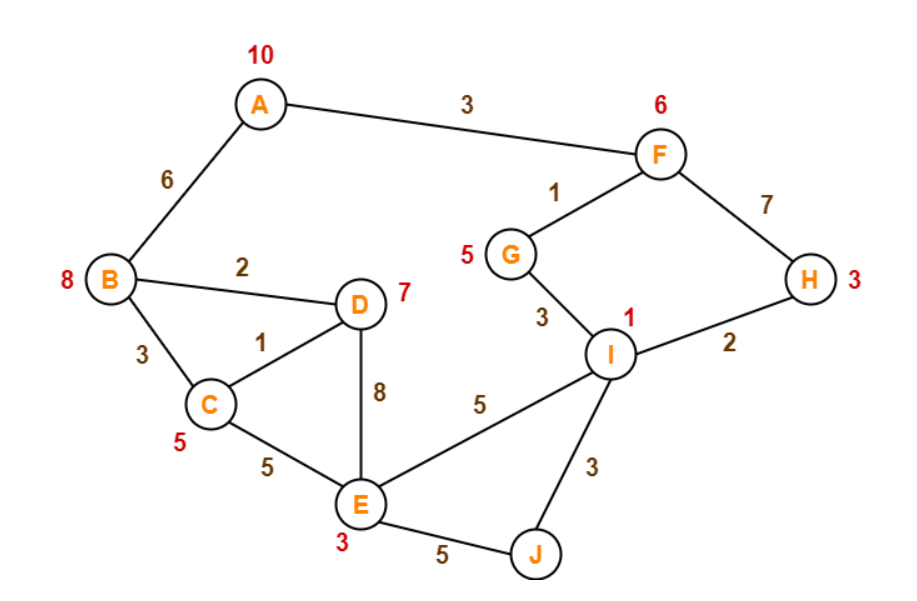

## 5.	Implement the following  Heuristic search techniques 
**a.	Branch-and-Bound         b. Simple Hill Climbing<br>
b.	Beam Search                   d.  Best-First Search<br>
e.A star**


In [3]:
class State:
    def __init__(self,node,par=None,g=0,h=0):
        self.node = node
        self.par=par
        self.g=g
        self.h=h

    def __str__(self):
        return f'{self.node}'
    
def bandb(start,goal):
    start=State(start,0)
    open=[start]
    closed=[]
    while open:
        node=open.pop(0)
        node1=node.node
        closed.append(node1)
        if node1==goal: return node
        for i in dic[node1]:
            if i[0] not in closed:
                open.append(State(i[0],node,i[1]+node.g,heur[i[0]]))
        open.sort(key=lambda x:x.g)
    print('element not found')
    return ''
      
def beam(start,goal,width):
    openlist=[State(start,0)]
    closed=[]
    wopen=openlist[:width]
    openlist.clear()
    while wopen:
        for i in range(width):
            try:
                state=wopen.pop(0)
                node=state.node
                closed.append(node)
                if node==goal: return state
                for i in dic[node]:
                    if i[0] not in closed:
                        openlist.append(State(i[0],state,i[1]+state.g,heur[i[0]]))
                openlist.sort(key=lambda x:x.h)
            except: break
        wopen=openlist[:width]
        openlist.clear()
    return None

def hill(start,goal):
    openlist=[State(start,0)]
    closed=[]
    while openlist:
        state=openlist.pop(0)
        node=state.node
        closed.append(node)
        if node==goal: return state
        temp=[]
        for i in dic[node]:
            if i[0] not in closed:
                temp.append(State(i[0],state,i[1]+state.g,heur[i[0]]))
        temp.sort(key=lambda x:x.h)
        openlist=temp+openlist
    return None

def bestfirst(start,goal):
    openlist=[State(start,0)]
    closed=[]
    while openlist:
        state=openlist.pop(0)
        node=state.node
        closed.append(node)
        if node==goal: return state
        for i in dic[node]:
            if i[0] not in closed:
                openlist.append(State(i[0],state,i[1]+state.g,heur[i[0]]))
        openlist.sort(key=lambda x:x.h)
    return None

def Astar(start,goal):
    openlist=[State(start,0)]
    closed=[]
    while openlist:
        state=openlist.pop(0)
        node=state.node
        closed.append(node)
        if node==goal: return state
        for i in dic[node]:
            if i[0] not in closed:
                openlist.append(State(i[0],state,i[1]+state.g,heur[i[0]]))
        openlist.sort(key=lambda x:x.h+x.g)
    return None

def display(solution):
    if solution:
        path = [chr(65+solution.node)]
        par = solution.par #for parent tracking
        while par:
            path.append(chr(65+par.node))
            par = par.par
        print(' -> '.join(map(str,path[::-1]))) #printing in reverse order from initial state to final
    else: print('no solution found')

'''matrix dict'''
from collections import defaultdict
n=int(input('enter number of nodes: '))
dic=defaultdict(list)
for _ in range(int(input('exit number of edges: '))):
    s,d,c=map(int, input().split())
    dic[s].append((d,c))
    dic[d].append((s,c))
print(f'enter heuristics of {n} nodes space seperated')
heur=[eval(x) for x in input().split()]
s=int(input('enter source node: '))
d=int(input('enter destination node: '))
print('branch and bound traversal')
display(bandb(s,d))
print('beam search traversal')
display(beam(s,d,3))
print('hill climbing traversal')
display(hill(s,d))
print('best first traversal')
display(bestfirst(s,d))
print('A star traversal')
display(Astar(s,d))

'''input'''
# 10
# 14
# 0 5 3
# 0 1 6
# 1 3 2
# 1 2 3
# 2 3 1
# 2 4 5
# 3 4 8
# 4 8 5
# 4 9 5
# 9 8 3
# 8 6 3
# 8 7 2
# 5 7 7
# 6 5 1
# 10 8 5 7 3 6 5 3 1 0
# 0
# 9

enter number of nodes: 10
exit number of edges: 14
0 5 3
0 1 6
1 3 2
1 2 3
2 3 1
2 4 5
3 4 8
4 8 5
4 9 5
9 8 3
8 6 3
8 7 2
5 7 7
6 5 1
enter heuristics of 10 nodes space seperated
10 8 5 7 3 6 5 3 1 0
enter source node: 0
enter destination node: 9
branch and bound traversal
A -> F -> G -> I -> J
beam search traversal
A -> F -> H -> I -> J
hill climbing traversal
A -> F -> H -> I -> J
best first traversal
A -> F -> H -> I -> J
A star traversal
A -> F -> G -> I -> J


'input'

## 7.	Implement 8-puzzle  problem  with the following techniques
**a.	Branch-and-Bound   b.  Simple Hill Climbing<br>
        c.    Beam Search             d. Best-First Search**
        **e.Astar algorithm**


In [7]:
class Puzzle:
    def __init__(self,puz,par=None,h=0,g=0):
        self.puz = puz #puzzle matrix
        self.par=par #for parent
        self.h=h #f(x)
        self.g=g #g(x)
    def __eq__(self,other):
        return self.puz==other.puz
    def __hash__(self):
        return hash((str(self.puz)))
    def __str__(self):
        return '\n'.join([' '.join(self.puz[i:i+col]) for i in range(0,row*col,col)])
    def isgoal(self,goal):
        return self.puz==goal

def heur(mat,goal): #function to find heuristic
    return sum([1 for i in range(row*col) if mat[i]!=goal[i]])

def sucessors(state):
    mat=state.puz
    ind=mat.index('0')
    children=[]
    if (ind+1)%col!=0: #moving right
        newmat=mat.copy()
        newmat[ind],newmat[ind+1]=newmat[ind+1],newmat[ind]
        children.append(Puzzle(newmat,state,heur(newmat,goal),state.g+1))
    if (ind+1)%col!=1: #moving left
        newmat=mat.copy()
        newmat[ind],newmat[ind-1]=newmat[ind-1],newmat[ind]
        children.append(Puzzle(newmat,state,heur(newmat,goal),state.g+1))
    if ind+col<=(row*col)-1: #movind down
        newmat=mat.copy()
        newmat[ind],newmat[ind+col]=newmat[ind+col],newmat[ind]
        children.append(Puzzle(newmat,state,heur(newmat,goal),state.g+1))
    if ind-col>=0: #moving up
        newmat=mat.copy()
        newmat[ind],newmat[ind-col]=newmat[ind-col],newmat[ind]
        children.append(Puzzle(newmat,state,heur(newmat,goal),state.g+1))
    return children

def Astar(mat,goal):
    openlist=[Puzzle(mat)] #openlist is a list of states
    closed=set()
    while openlist:
        state = openlist.pop(0)
        if state.isgoal(goal): return state
        closed.add(state)
        children = sucessors(state)
        for i in children:
            if i not in closed: openlist.append(i)
        openlist.sort(key=lambda y:y.h+y.g)
    return None

def bandb(mat,goal):
    openlist=[Puzzle(mat)] #openlist is a list of states
    closed=set()
    while openlist:
        state = openlist.pop(0)
        if state.isgoal(goal): return state
        closed.add(state)
        children = sucessors(state)
        for i in children:
            if i not in closed: openlist.append(i)
        openlist.sort(key=lambda y:y.g)
    return None

def hill(mat,goal):
    openlist=[Puzzle(mat)] #openlist is a list of states
    closed=set()
    while openlist:
        state = openlist.pop(0)
        if state.isgoal(goal): return state
        closed.add(state)
        children = sucessors(state)
        temp=[]
        for i in children:
            if i not in closed: temp.append(i)
        temp.sort(key=lambda y:y.h)
        openlist=temp+openlist
    return None

def beam(mat,goal,width):
    openlist=[Puzzle(mat)] #openlist is a list of states
    closed=set()
    wopen=openlist[:width]
    openlist.clear()
    while wopen:
        for i in range(width):
            try:
                state = wopen.pop(0)
                if state.isgoal(goal): return state
                closed.add(state)
                children = sucessors(state)
                for i in children:
                    if i not in closed: openlist.append(i)
                openlist.sort(key=lambda y:y.h)
            except: break
        wopen=openlist[:width]
        openlist.clear()
    return None

def bestfirst(mat,goal):
    openlist=[Puzzle(mat)] #openlist is a list of states
    closed=set()
    while openlist:
        state = openlist.pop(0)
        if state.isgoal(goal): return state
        closed.add(state)
        children = sucessors(state)
        for i in children:
            if i not in closed: openlist.append(i)
        openlist.sort(key=lambda y:y.h)
    return None

def display(solution,row,col):
    if solution:
        path = [solution]
        par = solution.par #for parent tracking
        while par:
            path.append(par)
            par = par.par
        for i in path[::-1]: print(f'{i}\n')
    else: print(f'there is no solution for this puzzle')

def solvable(arr):
    inv_count = 0
    empty_value = -1
    for i in range(0, 9):
        for j in range(i + 1, 9):
            if arr[j] != empty_value and arr[i] != empty_value and arr[i] > arr[j]:
                inv_count += 1
    return inv_count%2==0
        
if __name__ == '__main__':   
    mat=[input(f'enter {i+1}th pos: ') for i in range(9)]
    # mat=['0','8','1','7','2','3','6','4','5']
    # mat=['1','2','5','4','3','6','7','8','0'] #no sol
    # mat=['1','2','3','8','0','4','7','6','5'] #puzzle with no solution
    goal=['1','2','3','4','5','6','7','8','0'] #static goal
#     mat=['4','1','3','0','2','5','7','8','6',]
    # mat=['1','5','3','2','8','4','6','0','7']
    row=3
    col=3
    ch='y'
    if solvable(mat):
        while ch=='Y'or ch=='y':
            print('1.Astar\n2.Branch and bound\n3.Hill climbing\n4.Beam search\n5.Bestfirst')
            ch=int(input('enter your choice: '))
            if ch==1:
                print('astar algorithm')
                display(Astar(mat,goal),row,col)
            elif ch==2:
                print('branch and bound algorithm')
                display(bandb(mat,goal),row,col)
            elif ch==3:
                print('hill climbing algorithm')
                display(hill(mat,goal),row,col)
            elif ch==4:
                print('beam search algorithm')
                wid=int(input('enter beam width: '))
                display(beam(mat,goal,wid),row,col)
            else:
                print('bestfirst algorithm')
                display(bestfirst(mat,goal),row,col)
            ch=input('want to try for another algorithm(y/n): ')
    else: print('Puzzle is unsolvable')

enter 1th pos: 0
enter 2th pos: 8
enter 3th pos: 1
enter 4th pos: 7
enter 5th pos: 2
enter 6th pos: 3
enter 7th pos: 6
enter 8th pos: 4
enter 9th pos: 5
1.Astar
2.Branch and bound
3.Hill climbing
4.Beam search
5.Bestfirst
enter your choice: 1
astar algorithm
0 8 1
7 2 3
6 4 5

7 8 1
0 2 3
6 4 5

7 8 1
2 0 3
6 4 5

7 0 1
2 8 3
6 4 5

7 1 0
2 8 3
6 4 5

7 1 3
2 8 0
6 4 5

7 1 3
2 0 8
6 4 5

7 1 3
0 2 8
6 4 5

0 1 3
7 2 8
6 4 5

1 0 3
7 2 8
6 4 5

1 2 3
7 0 8
6 4 5

1 2 3
7 4 8
6 0 5

1 2 3
7 4 8
0 6 5

1 2 3
0 4 8
7 6 5

1 2 3
4 0 8
7 6 5

1 2 3
4 8 0
7 6 5

1 2 3
4 8 5
7 6 0

1 2 3
4 8 5
7 0 6

1 2 3
4 0 5
7 8 6

1 2 3
4 5 0
7 8 6

1 2 3
4 5 6
7 8 0

want to try for another algorithm(y/n): y
1.Astar
2.Branch and bound
3.Hill climbing
4.Beam search
5.Bestfirst
enter your choice: 5
bestfirst algorithm
0 8 1
7 2 3
6 4 5

8 0 1
7 2 3
6 4 5

8 2 1
7 0 3
6 4 5

8 2 1
7 4 3
6 0 5

8 2 1
7 4 3
0 6 5

8 2 1
0 4 3
7 6 5

8 2 1
4 0 3
7 6 5

8 0 1
4 2 3
7 6 5

8 1 0
4 2 3
7 6 5

8 1 3
4 2 0
7 6 5

